# PROJECT -2 : DETERMINING HUBBLE CONSTANT

## PLOTTING PROBABILITY DENSITY

In [1]:
# Importing necessary libraries
using DelimitedFiles
using Plots

In [2]:
# Integrating Using Simpson Method 
# Take column vector as argument
function Simpson(fn,h)
    N = length(fn)
    sum = ( fn[1]+ fn[N] ) 
    
    for i=2:N-1
        sum+= (4-2*(i%2))*fn[i]
    end
    
    sum = h*sum/3
return sum
end

Simpson (generic function with 1 method)

In [3]:
# Function to find the DM_LSS contribution

function DM_LSS(h,Zmax)

#Defining constants
c=3e8                    # Speed of light
G=6.6743e-11             # Gravitational constant
Omega_b_h_sq=0.022       # Baryon density parameter,multiplied by the factor h≡H0/100 (squared)
Omega_m_h_sq=0.143       # Density parameters of dark energy and total (dark+baryonic) matter,multiplied by the factor h≡H0/100
                         # (squared)

Xe=0.88                  # electron fraction
fIGM=0.84                # fraction of e that are in IGM, not bound in structure
mp=1.67e-27              # mass of proton


#output is in the units of pc/cm^3
dz=0.0001                # integration step size
z=0:dz:Zmax              # integration limit

integrand = @. (1+z)/sqrt(Omega_m_h_sq*(1+z)^3 + h^2-Omega_m_h_sq)  # Defining the function to be integrated
intg=Simpson(integrand,dz)                                          # Evaluating the integration 


coeff=3*c*Omega_b_h_sq*Xe*fIGM*3.2404e-18/(8*pi*G*mp)               # Defining the prefactor in DM_LSS

return coeff*intg*3.24e-23                                          # To convert to pc/cm^3
end


DM_LSS (generic function with 1 method)

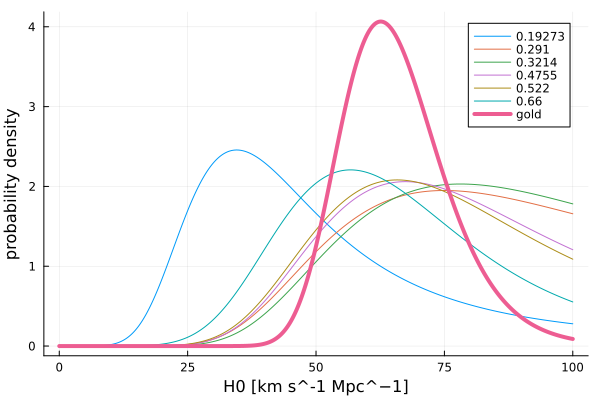

H0=62.7


In [4]:
# Plotting the probability denisty

dh=0.001                                                            # Step size for h
h=0:dh:1                                                            # limit of integration

Z=[0.19273,0.291,0.3214,0.4755,0.522,0.66]                          # Redshift data for FRBs
DM=[558,363.6,361.42,589.27,593.1,760.8]                            # Measured DM for FRBs in pc cm^-3
MWDM=[188,57.3,40.5,102,56.4,37]                                    # Milky Way DM, in pc cm^-3

LIKELI=ones(length(h))                                              # Initializing likelihood

p=plot()                                                            # Empty plot object


# Evaluating likelihood

for i=1:6
z=Z[i]
lss(h)=DM_LSS(h,z)                                                  # Mean DM for LSS
tot=DM[i]
mw=MWDM[i]

host=100/(1+z)                                                      # Mean DM for Host


sig_lss=40+140*z                                                    # Uncertainty in LSS DM ,in pc/cm^3
sig_mw=30/(1+z)                                                           # Uncertainty in MW DM , in pc/cm^3
sig_host=50/(1+z)                                                   # Uncertainty in Host DM ,in pc/cm^3
    
sig=sqrt(sig_lss^2+sig_mw^2+sig_host^2)                             # Total uncertainty
    

L(h) = exp(-(tot-mw-host-lss(h))^2/(2*sig^2))/sqrt(2*pi*sig^2)      # Defining likehihood
#println(lss(0.63))                                                 # Printing mean DM for LSS for H0 = 63
    

l=@. L(h)                                                           # Defining likehihood function
    
plot!(p,h*100,l/Simpson(l,dh),label=z)                              # Plotting normalized pdf for individual FRB
    
LIKELI=LIKELI.* @. L(h)                                             # Evaluating joint liklihood
end


plot!(p,h*100,LIKELI/Simpson(LIKELI,dh),linewidth=4,label="gold")                       # Plotting the joint likelihood
xlabel!("H0 [km s^-1 Mpc^−1]")
ylabel!("probability density")

display(p)
print("H0=")
println(argmax(LIKELI)*dh*100)
